## Part 1: Kernelized Linear Regression

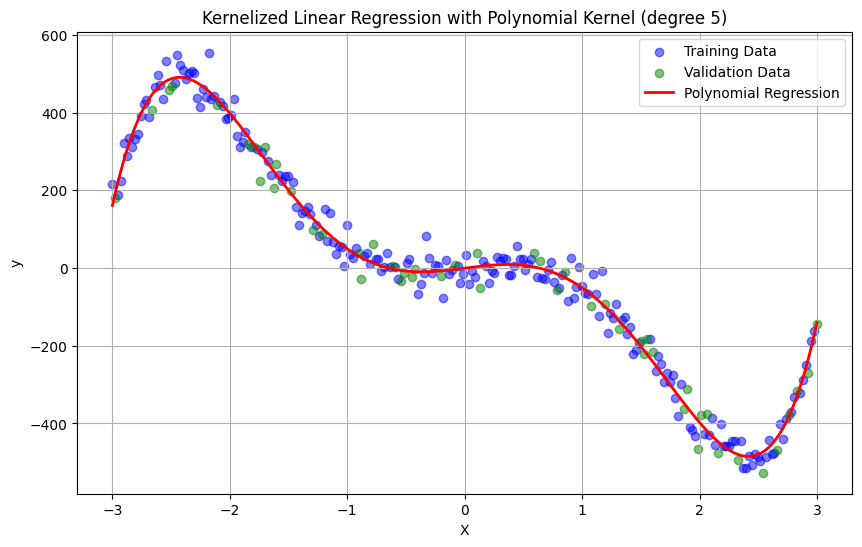

Training MSE: 900.17
Validation MSE: 985.41
Coefficients: [[  0.          39.02935706  -0.55002856 -99.16805146   0.19023307
    9.9163501 ]]
Intercept: [-0.3496932]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -----------------------------
# 1. Generate Nonlinear Training Data using a 5th order polynomial with sharp curvature
#    Here, we use: y = 10*x^5 - 100*x^3 + 40*x, which has two minima and two maxima with sharp transitions.
# -----------------------------
np.random.seed(42)

# Generate 250 evenly spaced points between -3 and 3 for a smooth curve and shuffle them
X_all = np.linspace(-3, 3, 250).reshape(-1, 1)
np.random.shuffle(X_all)

# Split into 200 training points and 50 validation points
X_train = X_all[:200]
y_train = 10 * X_train**5 - 100 * X_train**3 + 40 * X_train + np.random.randn(200, 1) * 30

X_val = X_all[200:]
y_val = 10 * X_val**5 - 100 * X_val**3 + 40 * X_val + np.random.randn(50, 1) * 30

# -----------------------------
# 2. TO DO: Linear Regression with Manually Created Polynomial Features (degree 5)
# -----------------------------
def polynomial_features(X, degree=5):
    """
    Transform input features to polynomial features of specified degree.
    This is our polynomial kernel implementation.
    """
    n_samples = X.shape[0]
    X_poly = np.zeros((n_samples, degree + 1))

    for i in range(degree + 1):
        X_poly[:, i] = X[:, 0] ** i

    return X_poly

X_train_poly = polynomial_features(X_train)
X_val_poly = polynomial_features(X_val)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_train_pred = poly_model.predict(X_train_poly)
y_val_pred = poly_model.predict(X_val_poly)

train_mse = np.mean((y_train - y_train_pred) ** 2)
val_mse = np.mean((y_val - y_val_pred) ** 2)
# -----------------------------
# 3. TO DO: Plot the Data and the Fit, and Print the Training and Validation Errors (MSE)
# -----------------------------

plt.figure(figsize=(10, 6))

X_plot = np.sort(X_all, axis=0)
X_plot_poly = polynomial_features(X_plot)
y_plot_pred = poly_model.predict(X_plot_poly)

plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
plt.scatter(X_val, y_val, color='green', alpha=0.5, label='Validation Data')
plt.plot(X_plot, y_plot_pred, color='red', linewidth=2, label='Polynomial Regression')
plt.title('Kernelized Linear Regression with Polynomial Kernel (degree 5)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print(f"Training MSE: {train_mse:.2f}")
print(f"Validation MSE: {val_mse:.2f}")
print(f"Coefficients: {poly_model.coef_}")
print(f"Intercept: {poly_model.intercept_}")


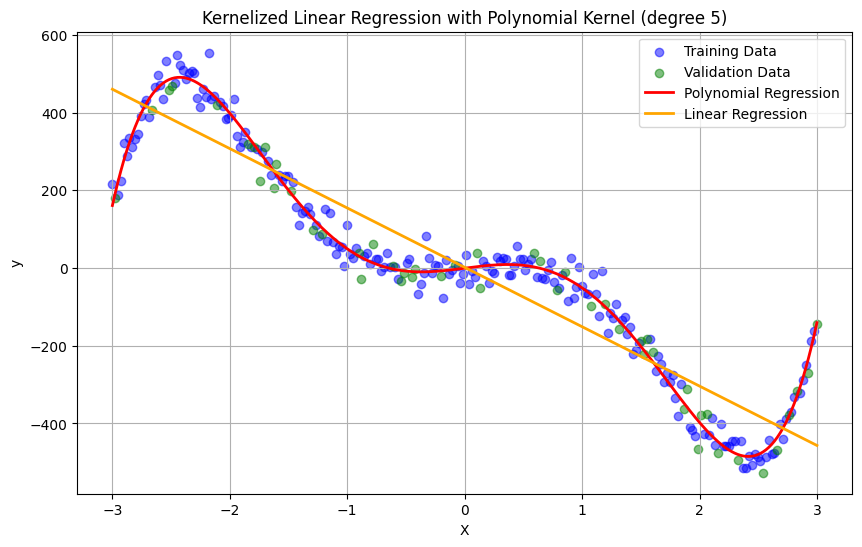

Training MSE (Polynomial): 900.17
Validation MSE (Polynomial): 985.41
Training MSE (Linear): 9538.90
Validation MSE (Linear): 10776.05


In [2]:
# prompt: Fit the best possible line using just the 1D input feature vector and compare the loss using 1D feature and 5D feature.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# ## Part 1: Kernelized Linear Regression

# -----------------------------
# 1. Generate Nonlinear Training Data using a 5th order polynomial with sharp curvature
#    Here, we use: y = 10*x^5 - 100*x^3 + 40*x, which has two minima and two maxima with sharp transitions.
# -----------------------------
np.random.seed(42)

# Generate 250 evenly spaced points between -3 and 3 for a smooth curve and shuffle them
X_all = np.linspace(-3, 3, 250).reshape(-1, 1)
np.random.shuffle(X_all)

# Split into 200 training points and 50 validation points
X_train = X_all[:200]
y_train = 10 * X_train**5 - 100 * X_train**3 + 40 * X_train + np.random.randn(200, 1) * 30

X_val = X_all[200:]
y_val = 10 * X_val**5 - 100 * X_val**3 + 40 * X_val + np.random.randn(50, 1) * 30

# -----------------------------
# 2. TO DO: Linear Regression with Manually Created Polynomial Features (degree 5)
# -----------------------------
def polynomial_features(X, degree=5):
    """
    Transform input features to polynomial features of specified degree.
    This is our polynomial kernel implementation.
    """
    n_samples = X.shape[0]
    X_poly = np.zeros((n_samples, degree + 1))

    for i in range(degree + 1):
        X_poly[:, i] = X[:, 0] ** i

    return X_poly

X_train_poly = polynomial_features(X_train)
X_val_poly = polynomial_features(X_val)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_train_pred = poly_model.predict(X_train_poly)
y_val_pred = poly_model.predict(X_val_poly)

train_mse_poly = np.mean((y_train - y_train_pred) ** 2)
val_mse_poly = np.mean((y_val - y_val_pred) ** 2)

# -----------------------------
# Fit a linear model using only the 1D feature
# -----------------------------
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred_linear = linear_model.predict(X_train)
y_val_pred_linear = linear_model.predict(X_val)

train_mse_linear = np.mean((y_train - y_train_pred_linear) ** 2)
val_mse_linear = np.mean((y_val - y_val_pred_linear) ** 2)

# -----------------------------
# 3. TO DO: Plot the Data and the Fit, and Print the Training and Validation Errors (MSE)
# -----------------------------

plt.figure(figsize=(10, 6))

X_plot = np.sort(X_all, axis=0)
X_plot_poly = polynomial_features(X_plot)
y_plot_pred = poly_model.predict(X_plot_poly)
y_plot_pred_linear = linear_model.predict(X_plot)


plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
plt.scatter(X_val, y_val, color='green', alpha=0.5, label='Validation Data')
plt.plot(X_plot, y_plot_pred, color='red', linewidth=2, label='Polynomial Regression')
plt.plot(X_plot, y_plot_pred_linear, color='orange', linewidth=2, label='Linear Regression')

plt.title('Kernelized Linear Regression with Polynomial Kernel (degree 5)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print(f"Training MSE (Polynomial): {train_mse_poly:.2f}")
print(f"Validation MSE (Polynomial): {val_mse_poly:.2f}")
print(f"Training MSE (Linear): {train_mse_linear:.2f}")
print(f"Validation MSE (Linear): {val_mse_linear:.2f}")



## Part 2: Logistic Regression and SoftMax Regression on MNIST

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression

X_mnist, y_mnist = fetch_openml("mnist_784",version=1,return_X_y=True,as_frame=False)

#make the data into usable form, normalization
y_mnist = y_mnist.astype('int')
X_mnist = X_mnist/255.0

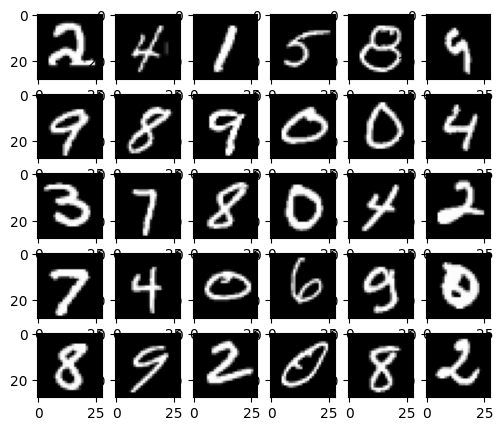

In [4]:
def display_grid(list_conn, num_col):
    num_row = int(list_conn.shape[0]/num_col)

    fig, axes = plt.subplots(num_row, num_col, figsize=(num_col,num_row))
    for i in range(num_col*num_row):
        #ax.set_title("Conn. matrix (log scale), S = "+str(i+1), fontsize=12)
        ax = axes[i%num_row, int(i/num_row)]
        full_im = ax.imshow(list_conn[i].reshape((28,28)), cmap='gray')

    #make room for the colourbar on the right and plot it
    fig.subplots_adjust(right=0.88)
    plt.show()

display_grid(X_mnist[np.random.choice(np.arange(X_mnist.shape[0]), 30)], 6)

In [5]:
def plot_curve1(pts, x_label, y_label, title):
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  index = np.arange(1, len(pts)+1, 1)
  plt.plot(index, pts, '-b')

  plt.show()

def calculate_accuracy(y_act, y_pred):
    """Calculate accuracy given actual and predicted labels."""
    y_act = np.asarray(y_act).flatten()
    y_pred = np.asarray(y_pred).flatten()
    return np.sum(y_act == y_pred) / len(y_act)

In [6]:
def stratified_train_test_logistic(X, y, nclasses=10):
    np.random.seed(24)   #so that the same split is obtained always
    list_train = []
    list_cv = []
    list_test = []
    for label in np.unique(y):
        indices = np.where(y==label)[0]
        np.random.shuffle(indices)
        list_train += list(indices[0:int(len(indices)*6/7)])
        list_test += list(indices[int(len(indices)*6/7) : ])

    X_train_logistic = X[list_train]
    y_train_logistic = y[list_train]

    X_test_logistic = X[list_test]
    y_test_logistic = y[list_test]

    return X_train_logistic, y_train_logistic, X_test_logistic, y_test_logistic

X_train_logistic, y_train_logistic, X_test_logistic, y_test_logistic = stratified_train_test_logistic(X_mnist, y_mnist, nclasses=10)

In [7]:
print(X_train_logistic.shape, y_train_logistic.shape, X_test_logistic.shape, y_test_logistic.shape)

(59996, 784) (59996,) (10004, 784) (10004,)


In [8]:
def one_vs_all_logistic_regression(X_train, y_train, X_test, y_test):
    n_classes = 10
    accuracies = []

    for i in range(n_classes):
        # Create binary labels for current class
        y_train_binary = (y_train == i).astype(int)
        y_test_binary = (y_test == i).astype(int)

        # Train logistic regression model
        model = LogisticRegression(max_iter=1000, solver='saga')
        model.fit(X_train, y_train_binary)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = calculate_accuracy(y_test_binary, y_pred)
        accuracies.append(accuracy)

        print(f"Class {i} - Accuracy: {accuracy:.4f}")

    return accuracies
# Run one-vs-all logistic regression
print("One-vs-All Logistic Regression Results:")
logistic_accuracies = one_vs_all_logistic_regression(X_train_logistic, y_train_logistic, X_test_logistic, y_test_logistic)
def softmax(x):
    # Numerical stability: subtract max from each row
    x_shifted = x - np.max(x, axis=1, keepdims=True)
    return np.exp(x_shifted) / np.sum(np.exp(x_shifted), axis=1, keepdims=True)

# With gradient descent
def loss_softmax(X, W, Y):
    # TO DO: Get the predicted Y_hat for the current W. dim: R^(n×k)
    Y_hat = softmax(X @ W)

    # TO DO: cross-entropy loss L
    L = -np.sum(Y * np.log(Y_hat)) / X.shape[0]
    return L

def gradient_softmax(X, W, Y):
    # TO DO: Vectorized implementation of softmax gradient
    # dim: R^(d×k)
    n_samples = X.shape[0]
    Y_hat = softmax(X @ W)
    grad = (1/n_samples) * X.T @ (Y_hat - Y)
    return grad

def learn_params_softmax(X, Y, lr, num_epochs):
    """
    Learn softmax regression parameters using gradient descent.

    X: Feature matrix (n×d)
    Y: One-hot encoded labels (n×k)
    lr: Learning rate
    num_epochs: Number of epochs

    Returns:
    W: Learned weight matrix
    loss: List of loss values over epochs
    """
    # TO DO: Initialize weights
    d = X.shape[1]  # number of features
    k = Y.shape[1]  # number of classes
    W = np.zeros((d, k))

    loss = []
    for i in range(num_epochs):
        # TO DO: Calculate loss and append to loss list
        current_loss = loss_softmax(X, W, Y)
        loss.append(current_loss)

        # TO DO: Gradient update
        grad = gradient_softmax(X, W, Y)
        W = W - lr * grad

        if (i+1) % 2 == 0:
            print(f"Epoch {i+1}/{num_epochs}, Loss: {current_loss:.4f}")

    return W, loss

One-vs-All Logistic Regression Results:
Class 0 - Accuracy: 0.9914
Class 1 - Accuracy: 0.9931
Class 2 - Accuracy: 0.9814
Class 3 - Accuracy: 0.9749
Class 4 - Accuracy: 0.9836
Class 5 - Accuracy: 0.9751
Class 6 - Accuracy: 0.9880
Class 7 - Accuracy: 0.9857
Class 8 - Accuracy: 0.9583
Class 9 - Accuracy: 0.9631


Epoch 2/10, Loss: 2.1962
Epoch 4/10, Loss: 2.0097
Epoch 6/10, Loss: 1.8498
Epoch 8/10, Loss: 1.7124
Epoch 10/10, Loss: 1.5946


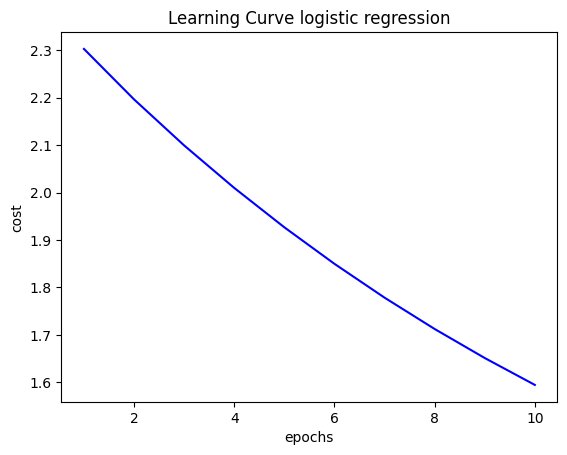

In [9]:
def train_test_softmax(X_train, y_train):
    # TO DO: Convert to one-hot encoding
    # TO DO: Create a zero matrix of shape (n_samples, n_classes)
    n_samples = X_train.shape[0]
    n_classes = 10
    Y = np.zeros((n_samples, n_classes))
    # TO DO: Assign 1 to the correct class indices
    for i in range(n_samples):
        Y[i, y_train[i]] = 1
    # TO DO: add 1s to X_train to allow bias in regression
    X_train_bias = np.hstack((np.ones((n_samples, 1)), X_train))

    epochs = 10
    w, loss = learn_params_softmax(X_train_bias, Y, 0.1, epochs)

    plot_curve1(loss, "epochs", "cost", "Learning Curve logistic regression")
    return w

w = train_test_softmax(X_train_logistic, y_train_logistic)


Accuracy on test set by Softmax regression: 0.78
[[9.420e+02 0.000e+00 8.000e+00 8.000e+00 1.000e+00 0.000e+00 1.600e+01
  2.000e+00 9.000e+00 1.000e+00]
 [0.000e+00 1.072e+03 1.300e+01 4.000e+00 0.000e+00 0.000e+00 2.000e+00
  4.000e+00 3.100e+01 0.000e+00]
 [3.300e+01 4.300e+01 7.560e+02 4.700e+01 1.500e+01 0.000e+00 4.600e+01
  1.600e+01 3.700e+01 6.000e+00]
 [1.400e+01 1.900e+01 3.400e+01 8.890e+02 1.000e+00 0.000e+00 9.000e+00
  7.000e+00 3.500e+01 1.300e+01]
 [7.000e+00 2.300e+01 9.000e+00 2.000e+00 7.520e+02 0.000e+00 3.500e+01
  1.200e+01 2.100e+01 1.140e+02]
 [1.150e+02 6.000e+01 1.800e+01 2.840e+02 2.100e+01 1.900e+02 5.000e+01
  1.200e+01 1.100e+02 4.200e+01]
 [3.500e+01 3.000e+01 2.000e+01 4.000e+00 8.000e+00 2.000e+00 8.740e+02
  0.000e+00 1.000e+01 0.000e+00]
 [2.200e+01 4.900e+01 1.800e+01 3.000e+00 9.000e+00 0.000e+00 1.000e+00
  8.880e+02 1.100e+01 4.100e+01]
 [2.500e+01 6.400e+01 1.300e+01 1.260e+02 6.000e+00 1.000e+00 1.000e+01
  9.000e+00 6.960e+02 2.500e+01]
 [2.6

[np.float64(0.9544072948328267),
 np.float64(0.9520426287744227),
 np.float64(0.7567567567567568),
 np.float64(0.8707149853085211),
 np.float64(0.7712820512820513),
 np.float64(0.2106430155210643),
 np.float64(0.8891149542217701),
 np.float64(0.8522072936660269),
 np.float64(0.7138461538461538),
 np.float64(0.7263581488933601)]

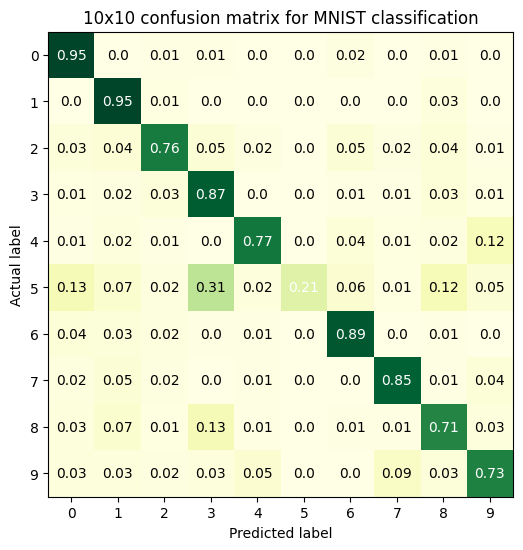

In [10]:

def display_confusion_matrix(y, y_pred, n, title_="10x10 confusion matrix for MNIST classification", labels_ = np.arange(10)):
    confusion_matrix = np.zeros((n, n))
    n_sample_per_class = np.zeros((n, 1))
    for i in range(n):
        n_sample_per_class[i, 0] = np.sum(y == i)
    for i in range(len(y)):#range(y.shape[0]):
        confusion_matrix[y[i], y_pred[i]] += 1

    print (confusion_matrix)

    confusion_matrix = confusion_matrix / n_sample_per_class

    fig, ax = plt.subplots(figsize=(6, 8))
    heatmap = ax.imshow(confusion_matrix, cmap="YlGn")

    ax.set_xticks(np.arange(n), labels=labels_)
    ax.set_yticks(np.arange(n), labels=labels_)
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.title(title_)
    for i in range(n):
        for j in range(n):
            if i == j:
                col = 'w'
            else:
                col = 'k'
            text = ax.text(j, i, np.round(confusion_matrix[i, j], 2), ha="center", va="center", color=col)
    return confusion_matrix

def display_test_results(W, X, y):
    # TO DO: Add 1s to X to allow bias in regression
    n_samples = X.shape[0]
    X_bias = np.hstack((np.ones((n_samples, 1)), X))
    # TO DO: Convert to one-hot encoding
    # TO DO: Create a zero matrix of shape (n_samples, n_classes)
    n_classes = 10
    Y = np.zeros((n_samples, n_classes))
    # TO DO: Assign 1 to the correct class indices
    for i in range(n_samples):
        Y[i, y[i]] = 1
    # TO DO: Get the probabilities for each class of the test set (X)
    prob = softmax(X_bias @ W)
    # TO DO: Decide the predicted class label
    pred_y = np.argmax(prob, axis=1)

    print ()
    print("Accuracy on test set by Softmax regression:", np.round(calculate_accuracy(y.T, pred_y), 2))

    #display the contingency table
    display_confusion_matrix(y.T, pred_y, len(np.unique(y)))
    # Calculate accuracy for each class
    class_accuracies = []
    for i in range(10):
        class_idx = (y == i)
        class_acc = np.mean(pred_y[class_idx] == i)
        class_accuracies.append(class_acc)
        print(f"Class {i} - Accuracy: {class_acc:.4f}")

    return class_accuracies
# softmax_accuracies = display_test_results(w, X_test_logistic, y_test_logistic)

# # Compare logistic regression and softmax regression accuracies
# print("\nComparison of Logistic Regression vs Softmax Regression:")
# print("Class\tLogistic\tSoftmax")
# for i in range(10):
#     print(f"{i}\t{logistic_accuracies[i]:.4f}\t{softmax_accuracies[i]:.4f}")

# # Plot comparison
# plt.figure(figsize=(10, 6))
# plt.bar(np.arange(10) - 0.2, logistic_accuracies, width=0.4, label='Logistic Regression')
# plt.bar(np.arange(10) + 0.2, softmax_accuracies, width=0.4, label='Softmax Regression')
# plt.xlabel('Class')
# plt.ylabel('Accuracy')
# plt.title('Comparison of Logistic Regression vs Softmax Regression')
# plt.xticks(np.arange(10))
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()



display_test_results(w, X_test_logistic, y_test_logistic)